In [1]:
import numpy as np
import matplotlib.pyplot as plt

Setting tarin and test sets

In [2]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

Getting samples nums

In [3]:
m = x_train.shape[0]
m = len(x_train)

Plot the data

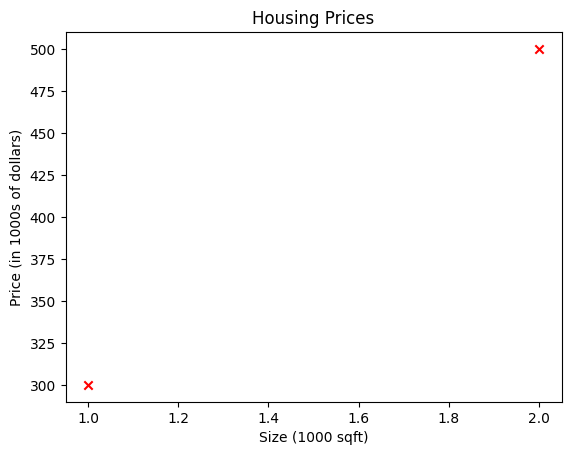

In [4]:
plt.scatter(x_train, y_train, marker="x", c="r")
plt.title("Housing Prices")
plt.ylabel("Price (in 1000s of dollars)")
plt.xlabel("Size (1000 sqft)")
plt.show()

Setting the coofecients

In [5]:
w = 200
b = 100

Model function

In [6]:
def univariable_linear_regression(x, w, b):
    m = x.shape[0]
    f_wb = np.empty(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

Train the model

In [7]:
p = univariable_linear_regression(x_train, w, b)
p

array([300., 500.])

Plot the model line

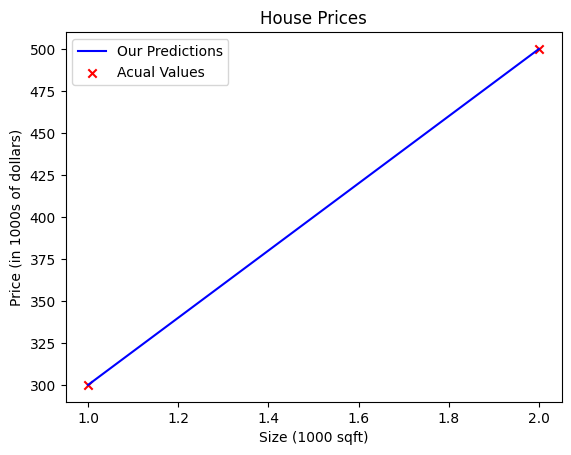

In [8]:
plt.plot(x_train, p, c="b", label="Our Predictions")
plt.scatter(x_train, y_train, marker="x", c="r", label="Acual Values")
plt.title('House Prices')
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

Make a prediction

In [9]:
x_i = 1.2
new_p = w * 1.2 + b
print(f"{new_p:.0f},000$")

340,000$


Cost function using loop

In [10]:
def cost(x, y, w, b):
    m = x.shape[0]
    cost_sum = 0
    for i in range(m):
        f = w * x[i] + b
        cost = (f - y[i]) ** 2
        cost_sum = cost_sum + cost
    j = (1 / (2 * m)) * cost_sum
    return j

Cost function using NumPy

In [11]:
def cost(x, y, w, b):
    cost = (1 / (2 * len(x))) * np.sum(((b + w * x) - y) ** 2)
    return cost

In [12]:
print(cost(x_train, y_train, w, b))

0.0


Compute Gradient

In [13]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

Compute Gradient Decent

In [14]:
def Compute_gradient_descent(
    x, y, alpha, num_iters, w_init=0, b_init=0, gradient_fun=compute_gradient
):
    b = b_init
    w = w_init
    while num_iters:
        # new drivitive
        dj_dw, dj_db = gradient_fun(x, y, w, b)
        # new w & b
        w -= alpha * dj_dw
        b -= alpha * dj_db
        num_iters -= 1
    return w, b

Gradient Decent using onece_approch

In [15]:
def gradient_descent(x, y, w_init, b_init, alpha, num_iters):
    m = x.shape[0]
    w_new, b_new = w_init, b_init
    for _ in range(num_iters):
        w = w_new
        b = b_new
        w_new -= alpha * np.sum(((w * x + b) - y) * x) / m
        b_new -= alpha * np.sum((w * x + b) - y) / m
    return w_new, b_new

Use gradient decent with small learning rate

In [16]:
w_init = 0
b_init = 0
iterations = 100000
tmp_alpha = 1.0e-2
w_final, b_final = gradient_descent(
    x_train,
    y_train,
    w_init,
    b_init,
    tmp_alpha,
    iterations,
)
print(f"(w,b) found by gradient descent: ({w_final:.4f},{b_final:.4f})")


(w,b) found by gradient descent: (200.0000,100.0000)


Use gradient decent with a large learning rate

In [17]:
iterations = 10
tmp_alpha = 8.0e-1
w_final, b_final = gradient_descent(
    x_train,
    y_train,
    w_init,
    b_init,
    tmp_alpha,
    iterations,
)
print(f"(w,b) found by gradient descent: ({w_final:.4f},{b_final:.4f})")

(w,b) found by gradient descent: (-48453.6513,-29956.6715)
